<a href="https://colab.research.google.com/github/2SUBDA/Block1_Crawl/blob/Week_3/Week3_Asynch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('fivethirtyeight')


In [36]:
#OBTAIN

data = pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv")
data = data.dropna()
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [37]:
# SCRUB - How can we consolidate the education levels?

data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

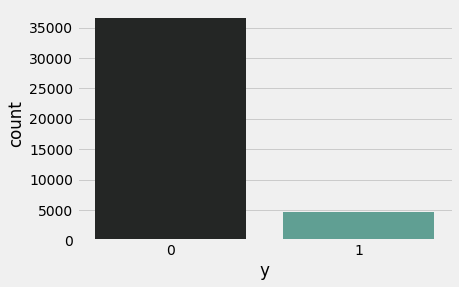

In [33]:
# EXPLORE - What is the distro of our data -

sns.countplot(x='y', data=data, palette="dark:#5A9")

In [12]:
# EXPLORE - Graphs are good but sometimes word might be better?

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)

print("The data has ", f'{(pct_of_no_sub*100):.4g}', "% of the clients without a term deposit")
print("and ", f'{(100-(pct_of_no_sub*100)):.4g}', "% with a term deposit")

#pct_of_sub = count_sub/(count_no_sub+count_sub)



The data has  88.73 % of the clients without a term deposit
and  11.27 % with a term deposit


In [16]:
# EXPLORE - Let's look at the mean between some of the numeric variables

data.groupby('y').mean()
#data.groupby('y').median()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


So what does the above table tell us?  Slight difference in age between customers who have a term deposit and those who don't - but what else?

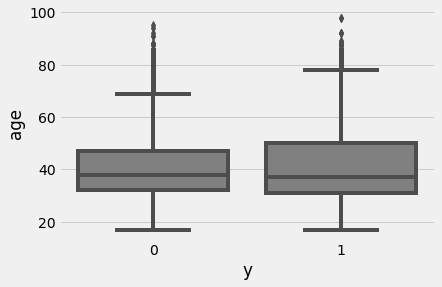

In [17]:
# EXPLORE - Should we look at the graph for age?

sns.boxplot(x="y", y="age", data=data, color = "gray");
plt.show()

In [34]:
# EXPLORE - We have a lot of categorical variables in this data - might there be some differences by job?  or by education?

data.groupby('job').mean()
#data.groupby('education').mean()
#data.groupby('marital').mean()
#data.groupby('housing').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes
job,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122817,0.504030,0.371810,0.001343,0.069756,0.319420,0.000096,0.034830,0.552005,0.023892,0.875936,0.124064,0.000000,0.444828,0.021781,0.533391
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078669,0.722606,0.197212,0.001513,0.796088,0.094878,0.000864,0.048952,0.010158,0.049060,0.657878,0.342122,0.000000,0.465096,0.025935,0.508969
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122940,0.735577,0.139423,0.002060,0.287088,0.160714,0.001374,0.092720,0.418956,0.039148,0.793269,0.206731,0.000000,0.440247,0.024725,0.535027
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151887,0.733019,0.112264,0.002830,0.608491,0.164151,0.000943,0.055660,0.131132,0.039623,0.699057,0.300943,0.000000,0.463208,0.027358,0.509434
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113201,0.714432,0.171341,0.001026,0.120041,0.101915,0.000000,0.030438,0.705540,0.042066,0.843365,0.156635,0.000000,0.466142,0.024282,0.509576
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202326,0.740698,0.054070,0.002907,0.475000,0.160465,0.001744,0.140116,0.165698,0.056977,0.771512,0.228488,0.000000,0.455814,0.025581,0.518605
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.093596,0.636172,0.266714,0.003519,0.237861,0.083040,0.002111,0.118227,0.538353,0.020408,0.801548,0.198452,0.000000,0.451091,0.028149,0.520760
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.134039,0.577979,0.286470,0.001512,0.187957,0.675737,0.000000,0.054926,0.043588,0.037793,0.769211,0.230789,0.000000,0.458050,0.025447,0.516503
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010286,0.046857,0.941714,0.001143,0.157714,0.408000,0.000000,0.049143,0.194286,0.190857,0.881143,0.118857,0.000000,0.435429,0.026286,0.538286


Text(0, 0.5, 'Frequency of Purchase')

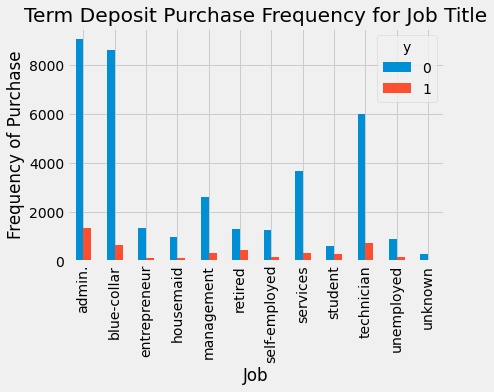

In [20]:
# EXPLORE - But the visualization of this might be better

pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Term Deposit Purchase Frequency by Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

# CONSIDER LOOKING AT OTHER CATEGORICAL VARIABLES

Text(0, 0.5, 'Proportion of Customers')

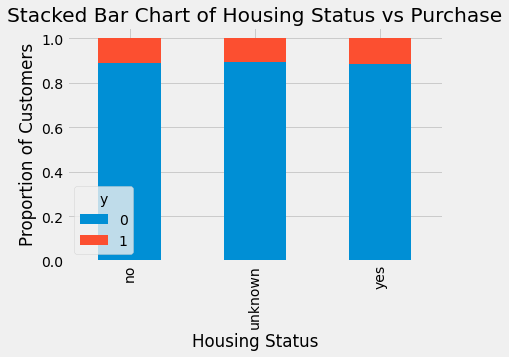

In [22]:
# EXPLORE 
table=pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Housing Status vs Purchase')
plt.xlabel('Housing Status')
plt.ylabel('Proportion of Customers')

# CONSIDER - Okay housing might not be good - what about education?  Or Marital? 

# CONSIDER - Does time matter?  Day of week vs Month of Year?

Text(0, 0.5, 'Frequency of Purchase')

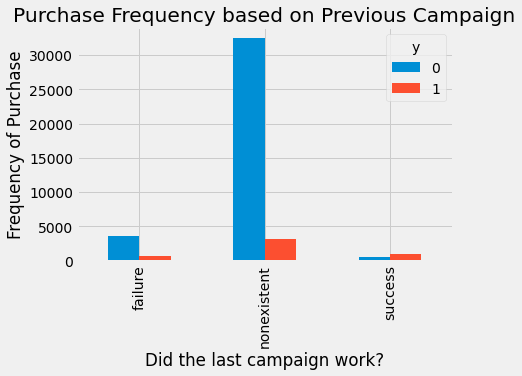

In [24]:
# EXPLORE - Does marketing make a difference?

pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency based on Previous Campaign')
plt.xlabel('Did the last campaign work?')
plt.ylabel('Frequency of Purchase')


In [38]:
# SCRUB - One More Change to Make for Modeling
# SCRUB - We need to create dummy variables for our categorical variables
# SCRUB - https://www.askpython.com/python/examples/creating-dummy-variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data_temp = data.join(cat_list)
    data = data_temp
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [42]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [43]:
# SCRUB - Let's break out our training data and test data
# NOTE - We are not going to look at balancing our data
# Consider - https://www.kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/ for an 
# example of using SMOTE

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# MODEL

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.209557
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:           0.407     
Dependent Variable:            y                          AIC:                        12185.4599
Date:                          2021-01-27 19:25           BIC:                        12607.1895
No. Observations:              28831                      Log-Likelihood:             -6041.7   
Df Model:                      50                         LL-Null:                    -10182.   
Df Residuals:                  28780                      LLR p-value:                0.0000    
Converged:                     0.0000                     Scale:                      1.0000    
No. Iterations:                35.0000                                                          
------------------------------------------------------------------------------------------------
                               Coef.     Std.Err.      z     P>|z|     

In [45]:
# MODEL - Okay that is a lot of variables - lets remove some - but remember if
# we keep month_apr, we might want to keep month_aug, etc

cols=['euribor3m', 'duration', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=X_train[cols]
y=y_train['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.217669
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.384     
Dependent Variable:   y                 AIC:               12579.2093
Date:                 2021-01-27 19:30  BIC:               12694.9782
No. Observations:     28831             Log-Likelihood:    -6275.6   
Df Model:             13                LL-Null:           -10182.   
Df Residuals:         28817             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7158   0.0178 -40.1838 0.0000 -0.7507 -0.6808
duration        

Okay - That is the StatsModel approach - one thing we can see is the summary gives us a view similar to the linear model format.
NOTE:  We did very little in the way of looking at the imbalanced data and we also didn't look @ feature elimination:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html


In [46]:
# MODEL - We have tried StatsModel - let's try sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# EVALUATE - okay ... so we have a model - how did we do?

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [48]:
# EVALUATE - Let's look at confusion matrix
# Read more about it here:  https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html?highlight=confusion

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7465  190]
 [ 606  389]]


In [50]:
# EVALUATE

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7655
           1       0.67      0.39      0.49       995

    accuracy                           0.91      8650
   macro avg       0.80      0.68      0.72      8650
weighted avg       0.90      0.91      0.90      8650



Okay - Accuracy looks good but what about recall?  The low recall here tells us our model struggles to find all the positive cases - one thing to consider is we are using an imbalanced sample - might our model improve if we used SMOTE as mentioned above?


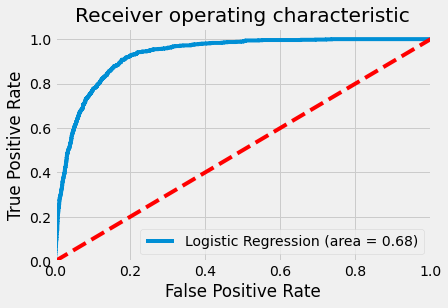

In [49]:
# EVALUATE - But can't we make a graph?

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Not too shabby - a good model will stay away from the red line and be in the top left corner - 